# Building an Artificial Neural Network

In [1]:
#Import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [6]:
# Import the dataset from csv file
dataset = pd.read_csv("../data/Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [17]:
# Let us encode the Gender column using Labelencoder option in SKLEARN
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [22]:
# Now that the Gender column has been taken care, let us use one hot encoding to encode the Country column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1])],remainder="passthrough")
X = transformer.fit_transform(X)

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [28]:
# let us split the data into training & test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# It is very important that we scale the data before building an artificial neural network. Let us use Standardscaler to scale the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [32]:
# Now that the scaling is done, let us proceed to build an ANN using tensorflow library
ann = tf.keras.models.Sequential()

In [33]:
# Add the input layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [34]:
# Add another hidden input layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [35]:
# Add the output layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [52]:
# Let us include early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=5, verbose=1)

In [53]:
# Let us compile our model now
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
# Time to train our model
ann.fit(scaled_X_train, y_train, batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.3334 - accuracy: 0.8577
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8677
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3309 - accuracy: 0.8611
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.8586
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8661
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8623
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3221 - accuracy: 0.8681
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3286 - accuracy: 0.8642
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8649
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3233 - accura

In [65]:
# Let us make the predictions now
y_pred = ann.predict(scaled_X_test)
y_pred = (y_pred > 0.5)
true_pred_comp = np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1)
true_pred_comp_df = pd.DataFrame(true_pred_comp,columns=['Predicted Label','True Label'])
true_pred_comp_df

,Predicted Label,True Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1995,1,1
1996,0,0
1997,1,1
1998,0,1


In [67]:
# Check out the confusion matrix, classification report and other metrics
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cm, '\n')
print(cr)

[[1541   66]
 [ 212  181]] 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<AxesSubplot:>

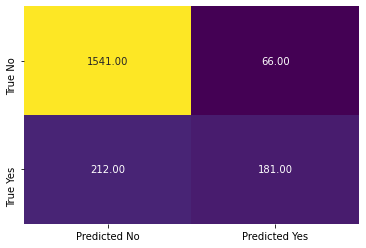

In [78]:
# Checkout the confusion matrix using heatmap
import seaborn as sns

sns.heatmap(cm,annot=True,fmt=".2f",cbar=False,cmap='viridis',xticklabels=['Predicted No', 'Predicted Yes'],
                                                              yticklabels=['True No','True Yes'])